### Frozen Lake 8*8

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

The surface is described using a grid like the following:

SFFF       (S: starting point, safe)

FHFH       (F: frozen surface, safe)

FFFH       (H: hole, fall to your doom)

HFFG       (G: goal, where the frisbee is located)


The episode ends when you reach the goal or fall in a hole. You receive a reward of 100 if you reach the goal, -100 if you fall into the hole, and -0.1 for each step you take.

### Getting Started

Run the following code and observe the result.

In [2]:
%run FrozenLake.ipynb

env = FrozenLakeEnv()
env.reset()

for _ in range(10):
    env.render()
    state, reward, done, info = env.step(env.action_space.sample()) # Take a random action
    
env.close()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG


What are the action space and the state space?

In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(64)


What does the following code indicate?

اینکه اگر در استیت 53 باشیم و اکشن 2 را انجام دهیم با چه احتمالی به چه استیتی می رویم و چه ریواردی می گیریمو اینکه آیا استیت هدف است یا نه.

In [4]:
print(env.P[53][2])

[(0.15, 61, -0.1, False), (0.7, 54, -100.1, True), (0.15, 45, -0.1, False)]


### Value Iteration

Find the best policy using the Value Iteration algorithm.

In [20]:
def value_Iteration(env, gamma = 0.5):
    numS = env.nS
#     print(numS)
    value = np.zeros(numS) #value array for each state
    e = 1e-20
    Qsa = np.zeros((64,4)) #Q(s,a) matrix
    
    for i in range(1000):
        pvalue = np.copy(value)
        
        for s in range(numS): #for each state
            for a in range(env.nA): # for each action for each state
                for p, snext, reward, _ in env.P[s][a]: 
                    Qsa[s][a] = Qsa[s][a] +p*(reward + gamma*pvalue[snext])
            value[s] = np.max(Qsa[s]) #value is max of Q(s,a) for each s
            
        if (np.sum(np.fabs(pvalue - value)) <= e):#convergence
            break
            
    bestAction = np.zeros((64))
    for i in range(64):
        bestAction[i] = np.argmax(Qsa[i])
    return Qsa,value,bestAction

env2 = FrozenLakeEnv()
env2.reset()
Qsa , value,best_action = value_Iteration(env2)
print('values :' ,value)
print('Qsa:',Qsa)

values : [2.48863927e+177 2.48863927e+177 2.48863927e+177 2.48863927e+177
 2.48863927e+177 2.48863927e+177 2.48863927e+177 2.48863927e+177
 2.48863927e+177 2.48863927e+177 2.48863927e+177 2.48863927e+177
 2.48863927e+177 2.48863927e+177 2.48863927e+177 2.48863927e+177
 2.48833771e+177 2.48693213e+177 2.47652942e+177 0.00000000e+000
 2.39475039e+177 2.47422272e+177 2.48641799e+177 2.48824728e+177
 2.48767725e+177 2.47867520e+177 2.41588850e+177 1.69111629e+177
 1.92999174e+177 0.00000000e+000 2.47125870e+177 2.48524930e+177
 2.48707139e+177 2.42846390e+177 2.06229626e+177 0.00000000e+000
 1.92114208e+177 1.93760941e+177 2.39081001e+177 2.46858353e+177
 2.48656867e+177 2.10485016e+177 0.00000000e+000 1.51070749e+177
 1.83544727e+177 1.76028351e+177 0.00000000e+000 2.09829597e+177
 2.48620933e+177 0.00000000e+000 1.82770616e+177 1.50598363e+177
 0.00000000e+000 1.23219797e+177 0.00000000e+000 1.72800844e+177
 2.48602217e+177 2.38707758e+177 2.28833095e+177 0.00000000e+000
 9.43400468e+176

Print what the best action in each state is.

In [21]:
print('best action in each state:',best_action)

best action in each state: [0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 2. 3. 3. 3.
 0. 0. 0. 0. 3. 0. 2. 3. 0. 0. 0. 0. 2. 2. 3. 3. 0. 0. 0. 2. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 3. 0. 3. 0. 1. 0. 0. 2. 3. 0. 0.]


Run your agent for one episode while acting greedy with respect to the learned policy.

Show your result and print the total reward that your agent has received.

In [25]:
# print(bestAction)
env = FrozenLakeEnv()
obs = env.reset()
done = False
total_reward = 0
maxIter = 1000
i=0
while(done!=True and i<maxIter):
    i+=1
    action = best_action[obs]
    obs,reward,done,_ = env.step(action)
    total_reward = total_reward + reward
print('total_reward:',total_reward)
print('i:',i)


#همگرا نمی شود .

total_reward: -99.9999999999986
i: 1000


### Q-Learning

Find the best policy using the Q-Learning algorithm.

Use an epsilon-greedy policy with decaying epsilon.

In [34]:
%run FrozenLake.ipynb
import matplotlib.pyplot as plt
import seaborn as sns
def Q_learning():
    env = FrozenLakeEnv()
    epsilon = 0.02 # epsilon foe e-greedy
    gamma = 0.7 #discount factor
    stateNum = 64
    actionNum = 4
    alpha = 0.9 #learning rate
    Qsa =  np.zeros((64,4)) #Q(s,a) matrix
#     print(Qsa)
    total = []
    for i in range(1000):
        obs = env.reset()
        total_reward = 0
        done = False
        alpha = max(0.001, 0.9*(0.6 ** (i//200)))
        while(done != True):
#             print('obs:',obs)
            if np.random.uniform(0, 1) < epsilon:
                action = np.random.choice(4)
            else:
                action = np.argmax(Qsa[obs])
                a = action
#             print('action:',a)
            nextObs, reward, done, _ = env.step(a)
            total_reward = total_reward + reward
            
            Qsa[obs][a] = Qsa[obs][a] + alpha * (reward + gamma *  np.max(Qsa[nextObs]) - Qsa[obs][a])
#             print(Qsa)
            obs = nextObs
        total.append(total_reward)
#     print(Qsa)
    
    bestAction = np.zeros((64))
    for i in range(64):
        bestAction[i] = np.argmax(Qsa[i])
    return Qsa,bestAction,total
  

Print what the best action in each state is.

In [35]:
Qsa,bestAction,total = Q_learning() 
print(bestAction)

[2. 2. 2. 2. 2. 2. 2. 1. 2. 3. 3. 3. 3. 3. 2. 1. 0. 3. 0. 0. 2. 3. 2. 1.
 0. 0. 3. 0. 0. 0. 2. 1. 0. 1. 3. 0. 2. 1. 3. 1. 0. 3. 0. 1. 3. 0. 0. 2.
 0. 0. 2. 0. 0. 3. 0. 2. 0. 1. 0. 0. 3. 2. 2. 0.]


Run your agent for one episode while acting greedy with respect to the learned policy.

Show your result and print the total reward that your agent has received.

[2. 2. 2. 2. 2. 2. 2. 1. 3. 3. 3. 3. 3. 2. 2. 1. 3. 0. 0. 0. 2. 3. 2. 1.
 1. 0. 0. 1. 1. 0. 2. 1. 0. 3. 0. 0. 2. 1. 3. 1. 0. 0. 0. 2. 3. 0. 0. 2.
 0. 0. 2. 0. 0. 3. 0. 1. 2. 1. 3. 0. 2. 2. 2. 0.]
total_reward: 98.30000000000001
maximum total reward in 1000 trial: 98.60000000000001


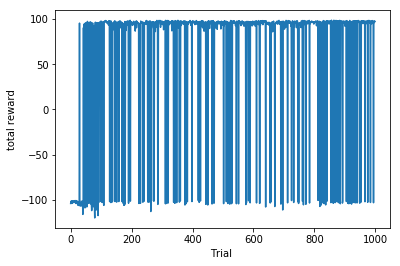

In [36]:
Qsa,bestAction,total = Q_learning()
print(bestAction)
env = FrozenLakeEnv()
obs = env.reset()
done = False
total_reward = 0
while(done!=True):
#     print('obs',obs)
    action = bestAction[obs]
#     print('action',action)
    obs,reward,done,_ = env.step(action)
    total_reward = total_reward + reward
print('total_reward:',total_reward)
plt.plot(total)
plt.xlabel("Trial ")
plt.ylabel("total reward")
print('maximum total reward in 1000 trial:',max(total))


# همگرا می شود

### SARSA

Find the best policy using the SARSA algorithm.

Use an epsilon-greedy policy with decaying epsilon.

In [39]:
def SARSA():
    Qsa = np.zeros((64,4))
    epsilon = 0.8 #e-greedy
    alpha = 0.7 #learning rate
    gamma = 0.8 # discount factor
    env = FrozenLakeEnv()
    action = 0 3#current action
    action2 = 0 #next action
    state2 = 0 #next state
    state = 0 #current state
    total = []
    for i in range(10000):
        done = False
        state = env.reset()
        total_reward = 0
        epsilon = epsilon *(1/(i+1)) #decaying epsilon
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Qsa[state])
            
        while(done != True):
            state2,reward,done,_ = env.step(action)
            total_reward = total_reward + reward
            if np.random.uniform(0, 1) < epsilon:
                action2 = env.action_space.sample()
            else:
                action2 = np.argmax(Qsa[state2])
            Qsa[state][action] = Qsa[state][action] + alpha * (reward + gamma * Qsa[state2][action2] - Qsa[state][action])
            
            state = state2
            action = action2
        total.append(total_reward)    
    bestAction = np.zeros((64))
    for i in range(64):
        
        bestAction[i] = (np.argmax(Qsa[i]))
    return Qsa,bestAction,total

Print what the best action in each state is.

In [40]:
Qsa,bestAction,total = SARSA()
print(bestAction)

[2. 2. 2. 2. 2. 2. 2. 1. 2. 3. 3. 3. 3. 3. 3. 1. 0. 0. 0. 0. 2. 3. 2. 2.
 0. 0. 0. 1. 0. 0. 2. 2. 0. 0. 3. 0. 2. 1. 3. 2. 0. 3. 0. 2. 3. 0. 0. 2.
 0. 0. 0. 3. 0. 0. 0. 2. 0. 1. 0. 0. 2. 0. 1. 0.]


Run your agent for one episode while acting greedy with respect to the learned policy.

Show your result and print the total reward that your agent has received.

total_reward: 86.90000000000003
maximum total reward in 1000 trial: 98.5


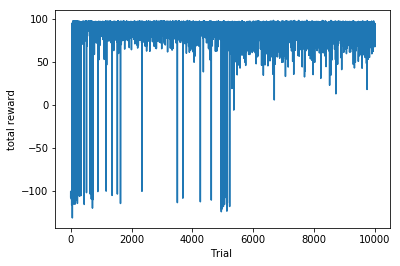

In [42]:
# Qsa,bestAction,total = SARSA()
# print(bestAction)
env = FrozenLakeEnv()
obs = env.reset()
done = False
total_reward = 0
while(done!=True):
#     print('obs',obs)
    action = bestAction[obs]
#     print('action',action)
    obs,reward,done,_ = env.step(action)
    total_reward = total_reward + reward
print('total_reward:',total_reward)
plt.plot(total)
plt.xlabel("Trial ")
plt.ylabel("total reward")
print('maximum total reward in 1000 trial:',max(total))